<a href="https://colab.research.google.com/github/Ramachalpandey/Project/blob/main/review_Ramachal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv("/content/review (1).csv")

In [ ]:
df.sample(5)

,Unnamed: 0,review,sentiment
601,601,I saw this movie and I thought this is a stupi...,0
984,984,Still it's quite interesting and entertaining ...,1
934,934,"It never condescends, all the characters have ...",1
107,107,An hour and a half I wish I could bring back.,0
217,217,It's this pandering to the audience that sabot...,0


In [ ]:
df.head()

,Unnamed: 0,review,sentiment
0,0,Not sure who was more lost - the flat characte...,0
1,1,Attempting artiness with black & white and cle...,0
2,2,Very little music or anything to speak of.,0
3,3,The best scene in the movie was when Gerardo i...,1
4,4,"The rest of the movie lacks art, charm, meanin...",0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  999 non-null    int64 
 1   review      999 non-null    object
 2   sentiment   999 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 23.5+ KB


In [ ]:
df.describe()

,Unnamed: 0,sentiment
count,999.000000,999.000000
mean,499.000000,0.500501
std,288.530761,0.500250
min,0.000000,0.000000
25%,249.500000,0.000000
50%,499.000000,1.000000
75%,748.500000,1.000000
max,998.000000,1.000000


In [ ]:
df.drop("Unnamed: 0",axis = 1, inplace=True)

In [ ]:
df.sample(5)

,review,sentiment
794,It was clear that she had the range and abilit...,1
621,But above all the exquisite visual composition...,1
325,It is not just a cult... it is a cult CLASSIC.,1
446,I believe the screenwriter did a good job of t...,1
741,"A very good film indeed, about great and uncon...",1


In [ ]:
#Check the system are balance or not
df["sentiment"].value_counts()

1    500
0    499
Name: sentiment, dtype: int64

In [ ]:
# Check Missing value
df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [ ]:
import nltk
nltk.download("punkt")
nltk.download("wordnet")
nltk.download("stopwords")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence #unique id

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, Dropout, Embedding, LSTM

In [ ]:
def cleantext(text):
  tokens = word_tokenize(text.lower()) # use to case conversion
  ftoken  = [t for t in tokens if (t.isalpha())] # Pertualtion removal
  stop = stopwords.words("english") # use to check the stop words
  ctoken = [t for t in ftoken if (t not in stop)] # use to remove the stop word
  lemma  = WordNetLemmatizer() # Use to removed the prefix
  ltoken  = [lemma.lemmatize(t) for t in ctoken]
  return " ".join(ltoken) # to joining the data


In [ ]:
df["review"] = df["review"].astype(str)

In [ ]:
df["clean_review"]=df["review"].apply(cleantext) # CLEAN REVIEW DATA TO SAVE INTO CLEAN_REVIEW

In [ ]:
from wordcloud import WordCloud

In [ ]:
x = df["clean_review"]
y = df["sentiment"]

In [ ]:
df.head()

,review,sentiment,clean_review
0,Not sure who was more lost - the flat characte...,0,sure lost flat character audience nearly half ...
1,Attempting artiness with black & white and cle...,0,attempting artiness black white clever camera ...
2,Very little music or anything to speak of.,0,little music anything speak
3,The best scene in the movie was when Gerardo i...,1,best scene movie gerardo trying find song keep...
4,"The rest of the movie lacks art, charm, meanin...",0,rest movie lack art charm meaning emptiness wo...


In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state=1)

In [95]:
# Check the Word TOtal Length
sentlen = []
for sent in df["clean_review"]:
  sentlen.append(len(word_tokenize(sent)))

df["SentLen"] = sentlen
df.head()

,review,sentiment,clean_review,SentLen
0,Not sure who was more lost - the flat characte...,0,sure lost flat character audience nearly half ...,8
1,Attempting artiness with black & white and cle...,0,attempting artiness black white clever camera ...,17
2,Very little music or anything to speak of.,0,little music anything speak,4
3,The best scene in the movie was when Gerardo i...,1,best scene movie gerardo trying find song keep...,10
4,"The rest of the movie lacks art, charm, meanin...",0,rest movie lack art charm meaning emptiness wo...,10


In [97]:
# #Check thew Maximum All the Data set maximum length sentence
max(sentlen)

38

In [98]:
np.quantile(sentlen, 0.95) # SELECT THE 95% WORD VALA DATA AND MAINTAIN THE SAME LENGTH IN ENTIRE DATA SET USING A ZERO PADDING

17.0

In [99]:
# 95% of the review in doc has len equals to 17


In [100]:
max_len = np.quantile(sentlen, 0.95) # SELECT THE 95% WORD VALA DATA AND MAINTAIN THE SAME LENGTH IN ENTIRE DATA SET USING A ZERO PADDING

In [101]:
tok = Tokenizer(char_level=False, split=" ") # IT IS  USE FOR VERCTORIZATION AND IT PROVIDE THE ID FOR EACH WORDS
#char_level	if True, every character will be treated as a token.

tok.fit_on_texts(xtrain)
tok.index_word

{1: 'movie',
 2: 'film',
 3: 'one',
 4: 'character',
 5: 'bad',
 6: 'like',
 7: 'time',
 8: 'good',
 9: 'even',
 10: 'acting',
 11: 'great',
 12: 'scene',
 13: 'well',
 14: 'really',
 15: 'see',
 16: 'story',
 17: 'best',
 18: 'made',
 19: 'actor',
 20: 'make',
 21: 'plot',
 22: 'work',
 23: 'wonderful',
 24: 'better',
 25: 'look',
 26: 'ever',
 27: 'thing',
 28: 'could',
 29: 'also',
 30: 'love',
 31: 'way',
 32: 'real',
 33: 'seen',
 34: 'part',
 35: 'would',
 36: 'think',
 37: 'performance',
 38: 'get',
 39: 'excellent',
 40: 'much',
 41: 'year',
 42: 'nothing',
 43: 'anyone',
 44: 'script',
 45: 'line',
 46: 'never',
 47: 'funny',
 48: 'little',
 49: 'watch',
 50: 'recommend',
 51: 'cast',
 52: 'life',
 53: 'man',
 54: 'music',
 55: 'go',
 56: 'watching',
 57: 'stupid',
 58: 'many',
 59: 'two',
 60: 'lot',
 61: 'people',
 62: 'awful',
 63: 'terrible',
 64: 'worth',
 65: 'pretty',
 66: 'still',
 67: 'art',
 68: 'saw',
 69: 'give',
 70: 'worse',
 71: 'interesting',
 72: 'waste',
 73:

In [102]:
vocab_len = len(tok.index_word)
vocab_len # CHECK THE TOTAL VOCABILARY LENGTH

2101

In [104]:
seqtrain = tok.texts_to_sequences(xtrain) #step1
seqtrain # ACCRODING TO ID EACH SENTENCE ARE COVERTED IN TO NUMERTIC FORM


[[416, 743, 276, 744, 417, 418, 745, 197],
 [277, 1],
 [278, 746],
 [152,
  747,
  748,
  16,
  62,
  749,
  419,
  279,
  420,
  750,
  751,
  752,
  753,
  122,
  198,
  280,
  199,
  2,
  421,
  153,
  754,
  755,
  422,
  756,
  757,
  758],
 [1, 105, 123, 12, 48, 124],
 [759, 12, 63, 760, 125, 6, 41, 200, 761, 762, 106, 763, 764, 765, 281],
 [766, 282, 36, 3, 17, 1, 26],
 [28, 767, 9, 49, 126, 423, 768],
 [5, 74, 64, 127, 283],
 [1, 29, 424],
 [1, 284],
 [285, 769, 286, 287],
 [65, 425, 23, 2, 18, 426, 201, 770, 771, 772, 773, 107, 202, 276, 7],
 [203, 75, 24, 774, 775, 75, 776, 777, 778, 24, 779, 152],
 [204, 780, 86, 7, 87, 50, 781],
 [30, 782, 1, 154, 1, 3, 427, 31],
 [155, 783, 288, 17, 428, 7],
 [32, 76, 22, 784, 785, 786, 12, 88, 787, 22, 26, 33],
 [156, 8, 205, 89, 289, 429, 430, 206, 788],
 [66, 431, 38, 5],
 [67, 157, 290, 789, 291, 790, 791],
 [292, 792, 62, 793, 432, 128, 794, 795, 796, 797, 798, 799, 281],
 [51, 11],
 [433],
 [434, 435, 800, 4, 207, 801, 208, 802],
 [6

In [106]:
seqmattrain = sequence.pad_sequences(seqtrain, maxlen= int(max_len)) #step2
seqmattrain # ZERO PADDING USE TO ADD THE ZERO IN THE SENTENCE AND EQULIZED THE DATA

array([[  0,   0,   0, ..., 418, 745, 197],
       [  0,   0,   0, ...,   0, 277,   1],
       [  0,   0,   0, ...,   0, 278, 746],
       ...,
       [  0,   0,   0, ...,   9,  32,   1],
       [  0,   0,   0, ...,  73,  28,  55],
       [  0,   0,   0, ...,   0, 341, 678]], dtype=int32)

In [107]:
seqtest = tok.texts_to_sequences(xtest)
seqmattest = sequence.pad_sequences(seqtest, maxlen=int(max_len))

In [108]:
vocab_len

2101

In [117]:
rnn = Sequential()

rnn.add(Embedding(vocab_len+1,700, input_length=int(max_len), mask_zero=True)) # FEATURE DATA SRINK WITHOUT LOSSING DATA
rnn.add( SimpleRNN(units=32, activation="tanh")) # RNN (Tanh IS SUITABLE FOR RNN)
rnn.add(Dense(units=32, activation="relu")) # HIDDEN LAYER
rnn.add(Dropout(0.2))

rnn.add(Dense(units=1, activation="sigmoid")) # OUT PUT LAYER

rnn.compile(optimizer="adam", loss="binary_crossentropy")

rnn.fit(seqmattrain, ytrain, batch_size=50, epochs=50)

ypred = rnn.predict(seqmattest)

ypred = ypred>0.5 #

Epoch 1/50
14/14 [==============================] - 2s 40ms/step - loss: 0.6873
Epoch 2/50
14/14 [==============================] - 1s 37ms/step - loss: 0.5006
Epoch 3/50
14/14 [==============================] - 1s 38ms/step - loss: 0.2729
Epoch 4/50
14/14 [==============================] - 1s 37ms/step - loss: 0.1108
Epoch 5/50
14/14 [==============================] - 1s 37ms/step - loss: 0.0488
Epoch 6/50
14/14 [==============================] - 1s 37ms/step - loss: 0.0287
Epoch 7/50
14/14 [==============================] - 1s 37ms/step - loss: 0.0183
Epoch 8/50
14/14 [==============================] - 1s 37ms/step - loss: 0.0140
Epoch 9/50
14/14 [==============================] - 1s 42ms/step - loss: 0.0117
Epoch 10/50
14/14 [==============================] - 1s 39ms/step - loss: 0.0113
Epoch 11/50
14/14 [==============================] - 1s 38ms/step - loss: 0.0099
Epoch 12/50
14/14 [==============================] - 1s 39ms/step - loss: 0.0094
Epoch 13/50
14/14 [==================

In [111]:
lstm = Sequential()
lstm.add(Embedding(vocab_len+1,38, input_length=int(max_len), mask_zero=True))
lstm.add(LSTM(units=40, activation="tanh"))
lstm.add(Dense(units=40, activation="relu"))
#lstm.add(Dropout(0.2))
lstm.add(Dense(units=1, activation="sigmoid"))
lstm.compile(optimizer="adam", loss="binary_crossentropy")
lstm.fit(seqmattrain, ytrain, batch_size=50, epochs=50)

Epoch 1/50
14/14 [==============================] - 6s 18ms/step - loss: 0.6923
Epoch 2/50
14/14 [==============================] - 0s 18ms/step - loss: 0.6788
Epoch 3/50
14/14 [==============================] - 0s 18ms/step - loss: 0.6112
Epoch 4/50
14/14 [==============================] - 0s 17ms/step - loss: 0.3974
Epoch 5/50
14/14 [==============================] - 0s 18ms/step - loss: 0.2168
Epoch 6/50
14/14 [==============================] - 0s 17ms/step - loss: 0.1203
Epoch 7/50
14/14 [==============================] - 0s 18ms/step - loss: 0.0797
Epoch 8/50
14/14 [==============================] - 0s 18ms/step - loss: 0.0555
Epoch 9/50
14/14 [==============================] - 0s 18ms/step - loss: 0.0517
Epoch 10/50
14/14 [==============================] - 0s 18ms/step - loss: 0.0379
Epoch 11/50
14/14 [==============================] - 0s 18ms/step - loss: 0.0325
Epoch 12/50
14/14 [==============================] - 0s 17ms/step - loss: 0.0280
Epoch 13/50
14/14 [==================

<Axes: >

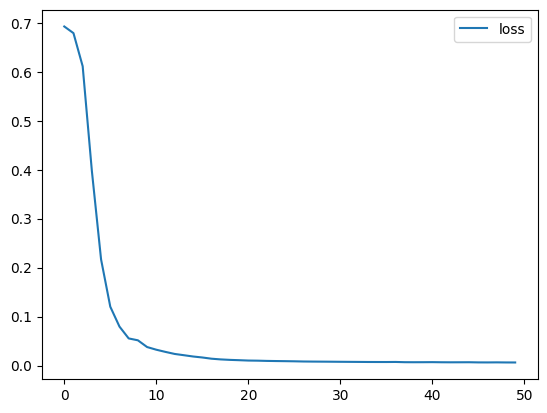

In [112]:
pd.DataFrame(lstm.history.history).plot()

In [113]:
ypred1 = lstm.predict(seqmattest)

10/10 [==============================] - 2s 5ms/step


In [114]:
ypred1 = ypred1>0.5

In [115]:
ypred1 = np.where(ypred1>.5,1,0)

In [116]:
ypred1

array([[0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
    